# Session 20
## Logistic Regression

# Data Generate

In [101]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
# samples corresponding to class 1
X1 = np.random.multivariate_normal([3, 2], cov=[[2, 1], [1, 1]], size=100)
y1 = np.ones((X1.shape[0], 1))
print(X1.shape)

# samples for class class 0
X2 = np.random.multivariate_normal([9, 8], cov=[[2, 1], [1, 2]], size=100)
y2 = np.zeros((X2.shape[0], 1))
print(X2.shape, y2.shape)

X = np.concatenate([X1, X2])
print(X.shape)

y = np.concatenate([y1, y2])
print(y.shape)

# shuffle the samples
idx = np.arange(X.shape[0])
print(idx.shape)
np.random.shuffle(idx)

X = X[idx]
y = y[idx]

(100, 2)
(100, 2) (100, 1)
(200, 2)
(200, 1)
(200,)


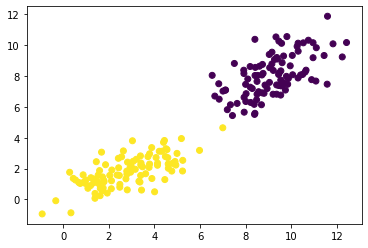

In [103]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [104]:
class LogisticRegression:

    def __get_gradient(self, X, y):
        gradient = []
        for  i in range(X.shape[1]):
            grad = -2*( ( (y - self.predict(X))* (X[:,i].reshape(-1,1)) ).sum() ) 
            gradient.append(grad)
        return np.array(gradient).reshape(-1,1)

    def __gradient_descent(self, X, y, learning_rate, epochs, batch_size):

        # start with any random weights
        self.w = np.random.randn(X.shape[1]).reshape(-1,1)
        # self.w = np.zeros((X.shape[1], 1)) 

        idx = np.arange(0,X.shape[0])

        losses = []

        for i in range(epochs):
            random_idx = np.random.choice(idx, size = batch_size)

            # update rule
            self.w = self.w - learning_rate*self.__get_gradient(X[random_idx], y[random_idx])

            ypred = self.predict(X)
            loss = self.loss(y, ypred)
            acc = self.accuracy(y, ypred)
            losses.append(loss)
            print("\r" + f"epoch: {i}, loss: {loss}, accuracy: {acc}", end="") 

        return losses


    def fit(self, X, y, method="batch", learning_rate=0.001, epochs=300, **kwargs):
        """ Training the model"""
        X = X.copy()
        ones_column = np.ones((len(X),1))
        X = np.concatenate([ones_column, X], axis=1)

        if method == "batch":
            batch_size = X.shape[0] # all the samples

        elif method == "mini-batch":
            if kwargs.get('batch_size') == None:
                batch_size = int(X.shape[0]*0.25)
            else:
                batch_size = kwargs['batch_size']

        elif method == 'stochastic':

            batch_size = 1

        return self.__gradient_descent(X, y, learning_rate, epochs, batch_size)
        
        
    def sigmoid(self, z):
        return 1/ (1 + np.e**(-z))

    def predict(self, X):
        if X.shape[1] != self.w.shape[0]:
            X = X.copy()
            ones_column = np.ones((len(X),1))
            X = np.concatenate([ones_column, X], axis=1)

        return self.sigmoid(X.dot(self.w))

    def loss(self, y, ypred):
        # print("y ypred shape", y.shape, ypred.shape)
        # get indices with y = 1
        ones_idx = y==1
        zero_idx = y==0

        ones_loss = (y[ones_idx]*np.log(ypred[ones_idx] + 1e-10) ).sum(axis=0)
        zeros_loss = ( (1-y[zero_idx]) * np.log(1-ypred[zero_idx] + 1e-10) ).sum(axis=0)
        # print("loss shape", zeros_loss.shape, ones_loss.shape)

        return -1 * (ones_loss + zeros_loss)

    def accuracy(self, ytrue, ypred):
        return  ((ypred > 0.5).astype('int') == ytrue).mean()

In [105]:
y[[0,1,2,3]]*y[[0,1,2,3]]

array([[0.],
       [0.],
       [1.],
       [0.]])

In [117]:
lr = LogisticRegression()
losses = lr.fit(X, y, method='batch', learning_rate=0.0001, epochs= 500)

epoch: 499, loss: 25.67066567380969, accuracy: 0.995

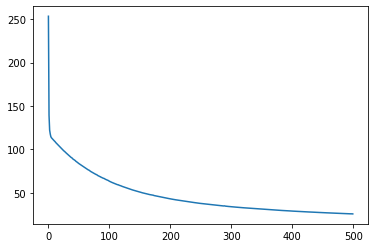

In [119]:
plt.plot(losses)
plt.show()

## Generate Points for visualization

In [108]:
from mpl_toolkits import mplot3d

In [120]:
f1 = np.linspace(X[:,0].min(), X[:,0].max(), 50)
f2 = np.linspace(X[:,1].min(), X[:,1].max(), 50)

f1, f2 = np.meshgrid(f1, f2)
print(f1.shape, f2.shape)

prediction = []
for tp in zip(f1.reshape(-1,1), f2.reshape(-1,1)):
    tp = np.array(tp).reshape(1, -1)
    
    pred = lr.predict(tp)
    prediction.append(pred)

prediction = np.array(prediction).reshape(f1.shape)
print(prediction.shape)

(50, 50) (50, 50)
(50, 50)


In [121]:
# prediction on training data 
train_pred = []

for point in X:
    point = np.array(point).reshape(1, -1)
    train_pred.append(lr.predict(point)[0])
train_pred = np.array(train_pred)

In [122]:
print(train_pred.shape)

(200, 1)


## Plotting the prediction plane

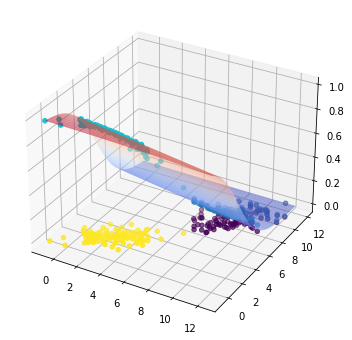

In [123]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')

ax.plot_surface(f1, f2, prediction, cmap=plt.cm.coolwarm, alpha=0.5)

# plot the training data on feature plane
z = np.zeros((X.shape[0],))
ax.scatter(X[:,0], X[:,1], z, c=y)

# plot prediction corresponding to training data
ax.scatter(X[:,0], X[:,1], train_pred, c=y, cmap=plt.cm.tab10)
plt.show()


In [124]:
ypred = (train_pred>0.5).astype('int')

print((ypred[y==0]).sum())
print((ypred[y==1]).sum())


0
99


In [125]:
lr.w

array([[ 3.39194038],
       [-0.11781613],
       [-0.65573522]])